# Cart Algortihm

In [1]:
import pandas as pd
from sklearn import tree
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Ruta a las carpetas de train y test
train_folder = '../data/final_data/train'
test_folder = '../data/final_data/test'

# Función para cargar todos los archivos CSV en una carpeta y combinarlos en un DataFrame
def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Cargar y combinar los datos de entrenamiento y prueba
train_df = load_data_from_folder(train_folder)
test_df = load_data_from_folder(test_folder)


# Definir las clases de precio usando pd.cut() en ambos conjuntos de datos
train_df['price_class'] = pd.qcut(train_df['price'], q=3, labels=['baja', 'media', 'alta'])
test_df['price_class'] = pd.qcut(test_df['price'], q=3, labels=['baja', 'media', 'alta'])


C:\Users\gipas\AppData\Local\Temp\ipykernel_12708\4139414489.py:8: DtypeWarning: Columns (125,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in all_files]
C:\Users\gipas\AppData\Local\Temp\ipykernel_12708\4139414489.py:8: DtypeWarning: Columns (144,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in all_files]
C:\Users\gipas\AppData\Local\Temp\ipykernel_12708\4139414489.py:8: DtypeWarning: Columns (129,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in all_files]
C:\Users\gipas\AppData\Local\Temp\ipykernel_12708\4139414489.py:8: DtypeWarning: Columns (144,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in all_files]
C:\Users\gipas\AppData\Local\Temp\ipykernel_12708\4139414489.py:8: DtypeWarning: Columns (14

In [4]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas a codificar
ordinal_columns = ['brand', 'model', 'color', 'fuelType', 'province', 'environmentalLabel']

# Creamos un diccionario para almacenar cada LabelEncoder por separado
label_encoders = {}

for col in ordinal_columns:
    le = LabelEncoder()
    
    # Convertir la columna a string para evitar problemas de tipo
    #train_df[col] = train_df[col].astype(str)
    #test_df[col] = test_df[col].astype(str)
    
    # Ajustar el encoder al conjunto de entrenamiento
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.fit_transform(test_df[col])
    # Filtrar test_df para que sólo tenga categorías que ya están en le.classes_
    #test_df = test_df[test_df[col].isin(le.classes_)]
    
    # Extender las clases para incluir cualquier nueva categoría en test_df
    #le.classes_ = np.append(le.classes_, np.setdiff1d(test_df[col].unique(), le.classes_))
    
    # Transformar el conjunto de prueba
    #test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le


# Visualizamos el resultado de la codificación en la columna de ejemplo 'color'
print(train_df['color'])


0         4157
1         4940
2         1138
3         5013
4         3928
          ... 
115592    1387
115593     118
115594    4157
115595    1202
115596    1138
Name: color, Length: 115597, dtype: int64


Accuracy: 0.812939144932714

Classification Report:
               precision    recall  f1-score   support

        alta       0.83      0.78      0.81      7499
        baja       0.88      0.87      0.88     14923
       media       0.71      0.75      0.73     11166

    accuracy                           0.81     33588
   macro avg       0.81      0.80      0.81     33588
weighted avg       0.82      0.81      0.81     33588


Confusion Matrix:
 [[ 5871    72  1556]
 [   55 13051  1817]
 [ 1128  1655  8383]]


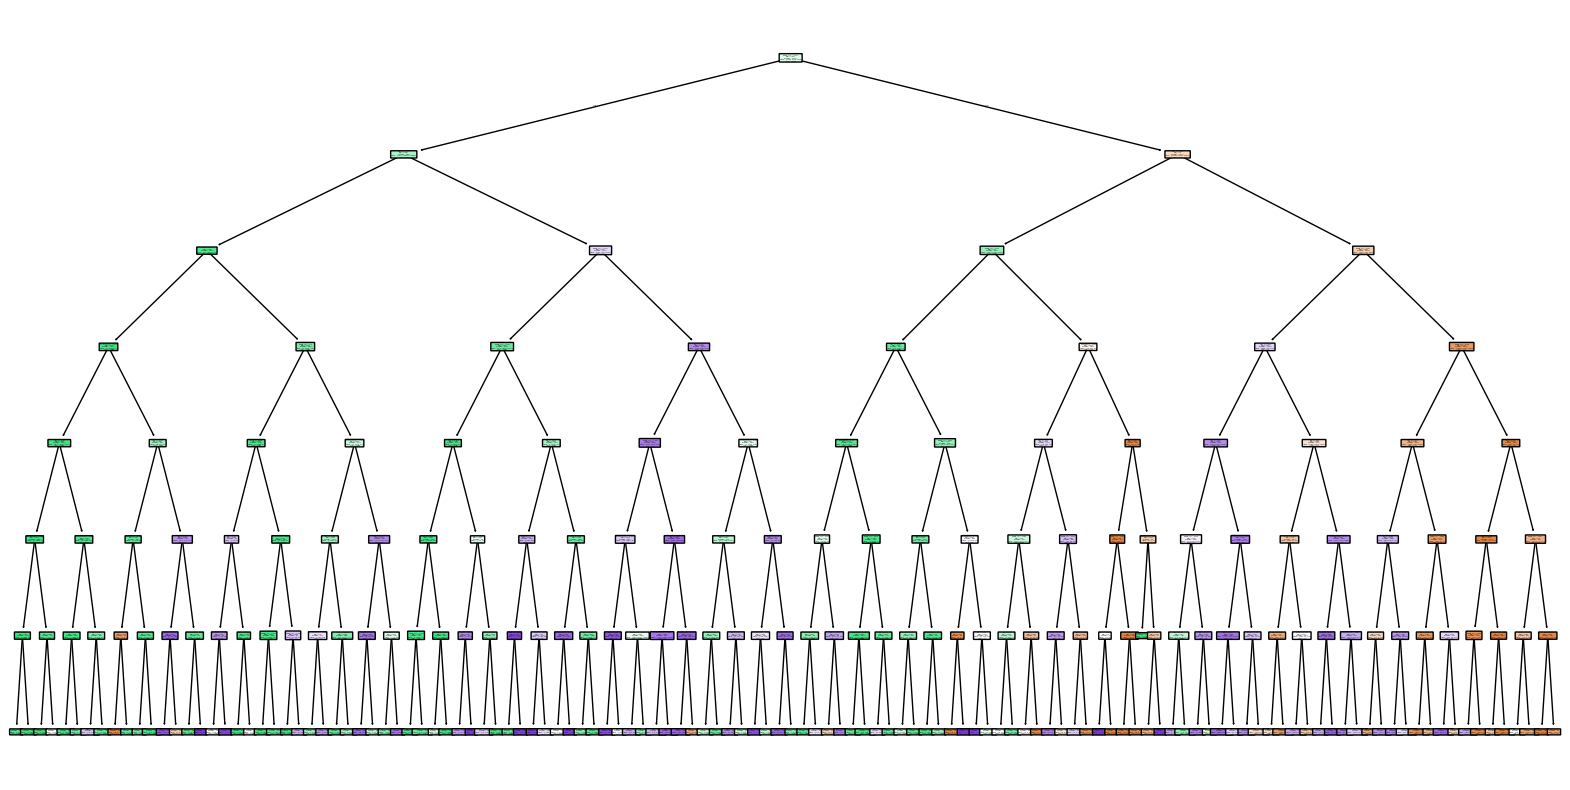

In [5]:


numeric_columns2 = ['price', 'km', 'year', 'cubicCapacity','power_cv', 'co2Emissions', 
                   'color', 'maxSpeed',]

train_df = train_df.dropna(subset=numeric_columns2)
test_df = test_df.dropna(subset=numeric_columns2)

# Eliminar las columnas no necesarias para el modelo
columns_to_keep = numeric_columns2 + ordinal_columns + ['price_class']
train_df = train_df[columns_to_keep]
test_df = test_df[columns_to_keep]



# Separar características (X) y variable objetivo (y) en ambos conjuntos
X_train = train_df.drop(columns=['price', 'price_class'])
y_train = train_df['price_class']

X_test = test_df.drop(columns=['price', 'price_class'])
y_test = test_df['price_class']

# Guardar nombres de las columnas antes de normalizar
feature_names = X_train.columns


# (Opcional) Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo CART
cart_model = DecisionTreeClassifier(random_state=42, max_depth=7)
cart_model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
y_pred = cart_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Visualizar el Árbol de Decisión con plot_tree
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=feature_names, class_names=['baja', 'media', 'alta'], filled=True, rounded=True)
plt.show()